# Traitement d’images
# TP 4 :Les descripteurs de texture GLCM et LBP

@author : bahi ouadie

In [29]:
import matplotlib.pyplot as plt
import skimage as ski
import numpy as np

## Descripteur GLCM

In [30]:
brick = ski.data.brick()
grass = ski.data.grass()
gravel = ski.data.gravel()

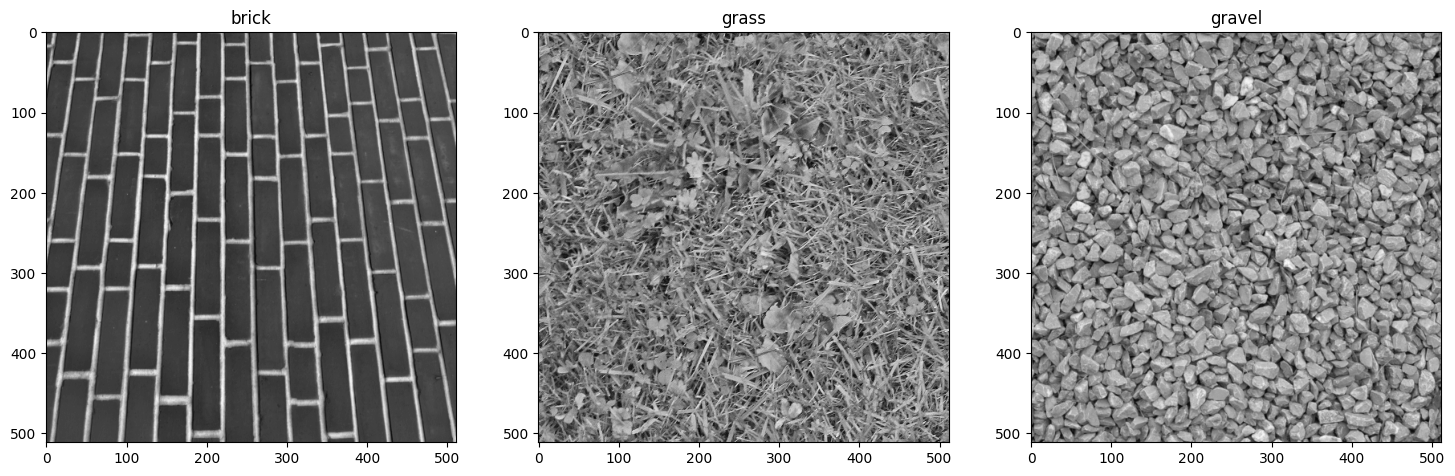

In [31]:
images = [brick, grass, gravel]
titles = ['brick', 'grass', 'gravel']
plt.figure(figsize=(18, 10))
for i in range(len(images)) :
        plt.subplot(1,3,i+1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i])

plt.show()

In [32]:
d=[1, 2]
angl=[0, np.pi/2]

In [33]:
g_brick = ski.feature.graycomatrix(brick , d, angl, levels=256, normed=True, symmetric=True)
g_grass = ski.feature.graycomatrix(grass , d, angl, levels=256, normed=True, symmetric=True)
g_gravel = ski.feature.graycomatrix(gravel , d, angl, levels=256, normed=True, symmetric=True)

In [34]:
props = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

In [35]:
prop_brick = {prop: ski.feature.graycoprops(g_brick, prop) for prop in props}
prop_grass = {prop: ski.feature.graycoprops(g_grass, prop) for prop in props}
prop_gravel = {prop: ski.feature.graycoprops(g_gravel, prop) for prop in props}

In [36]:
def format_array(arr):
    return ', '.join([f"{val}" for val in arr])

In [37]:
green = "\033[32m"
reset = "\033[0m"
bold = "\033[31m"

print(bold + "Brick GLCM Features:")
for key, value in prop_brick.items():
    print(f"{green}\t{key}: {reset}{format_array(value)}")

print(bold + "\nGrass GLCM Features:")
for key, value in prop_grass.items():
    print(f"{green}\t{key}: {reset} {format_array(value)}")

print(bold + "\nGravel GLCM Features:")
for key, value in prop_gravel.items():
    print(f"{green}\t{key}: {reset} {format_array(value)}")

Brick GLCM Features:
	contrast: [146.03957085  33.08171401], [451.34533931 106.13021982]
	dissimilarity: [6.00295453 2.4456221 ], [10.57252221  4.31205193]
	homogeneity: [0.45861724 0.54950034], [0.39168623 0.46274586]
	energy: [0.10188624 0.11410251], [0.08903273 0.09892468]
	correlation: [0.89246299 0.97562833], [0.66782518 0.92182304]
	ASM: [0.01038081 0.01301938], [0.00792683 0.00978609]

Grass GLCM Features:
	contrast:  [750.52325786 919.99001269], [1606.70937883 1679.11852405]
	dissimilarity:  [19.39524599 20.81822942], [29.27469746 29.70549556]
	homogeneity:  [0.06591813 0.06535861], [0.04381368 0.04427488]
	energy:  [0.0100998  0.00997172], [0.00847128 0.00847778]
	correlation:  [0.74799076 0.69106079], [0.46053237 0.43619806]
	ASM:  [1.02005888e-04 9.94351263e-05], [7.1762632e-05 7.1872783e-05]

Gravel GLCM Features:
	contrast:  [405.39177547 407.05503149], [1049.5459329  1066.63707108]
	dissimilarity:  [13.7094889  13.94096288], [22.76523438 23.25740656]
	homogeneity:  [0.101

> Upon close examination of the values, it's evident that the GRAVEL image exhibits similarities with the GRASS image, especially when the distance parameter is set to 2 and the angle is set to π/2, suggesting comparable textures between the two images. Conversely, the values differ significantly from those of the BRICK image, signifying a notable distinction in the textures of the two images.

## Descripteur LBP

In [38]:
def lbp_histogram(img):
    # img = ski.color.rgb2gray(color_image)
    patterns = ski.feature.local_binary_pattern(img, 8, 1)
    hist, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=True)
    return hist

In [39]:
brick_feats = lbp_histogram(brick)
gravel_feats = lbp_histogram(gravel)
# img_feats = lbp_histogram(img)
grass_feats = lbp_histogram(grass)

In [40]:
import scipy as sp

In [41]:
grass_brick= sp.spatial.distance.euclidean(grass_feats, brick_feats)
grass_gravel= sp.spatial.distance.euclidean(grass_feats, gravel_feats)

In [42]:
print(grass_brick)
print(grass_gravel)

0.14437235191712955
0.05600663020793313


> Upon observation, it is evident that the GRASS and GRAVEL images exhibit greater similarity, as indicated by their shorter distance metrics. Conversely, the GRASS and BRICK images demonstrate lesser similarity, reflected by their larger distance metrics.

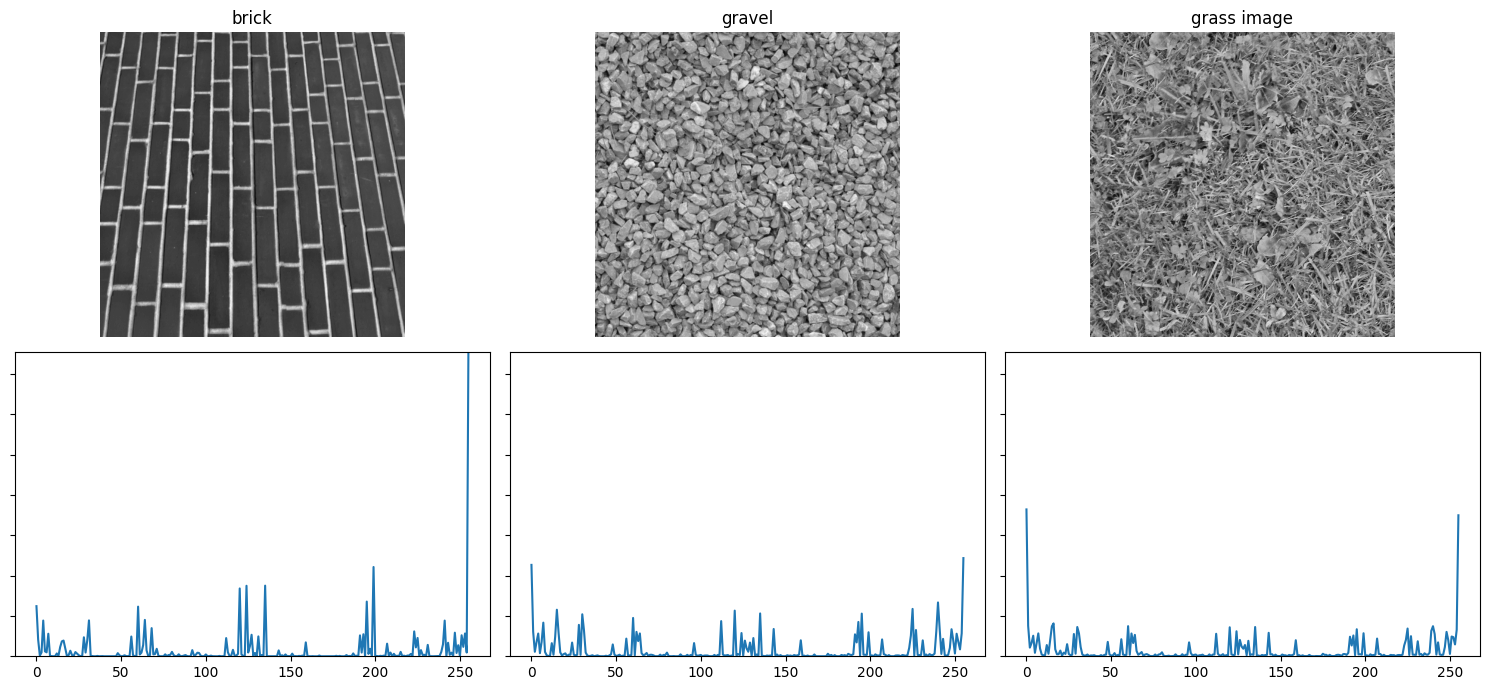

In [43]:
images = [brick, gravel, grass]
features = [brick_feats, gravel_feats, grass_feats]
titles = ['brick', 'gravel', 'grass image']

hmax = max(feat.max() for feat in features)

fig, ax = plt.subplots(2, len(images), figsize=(15, 7))

for i, (image, feat, title) in enumerate(zip(images, features, titles)):
    ax[0, i].imshow(image, "gray")
    ax[0, i].axis('off')
    ax[0, i].set_title(title)
    ax[1, i].plot(feat)
    ax[1, i].set_ylim([0, hmax])
    ax[1, i].axes.yaxis.set_ticklabels([])

plt.tight_layout()
plt.show()
